## Engineering Existing Data to Follow Multivariate Linear Regression Assumptions

Jackie Zuker

### Assumptions: 
1. **Linear relationship** - Features should have a linear relationship with the outcome
2. **Multivariate normality** - The error from the model should be normally distributed
3. **Homoscedasticity** - The distribution of error should be consistent for all predicted values
4. **Low multicollinearity** - correlations between features should be low or non-existent

The model in use has problems with heterscedasticity and multivariate non-normality. 

In [16]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
#import statsmodels.formula.api as smf
#import statsmodels as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [17]:
# Acquire, load, and preview the data.
data = pd.read_csv(
    'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',
    index_col=0
)
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,TV,Radio,Newspaper,Sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


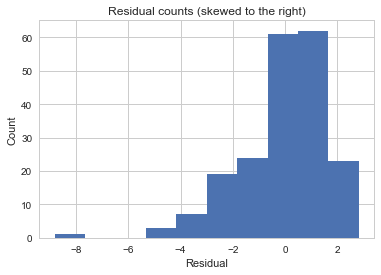

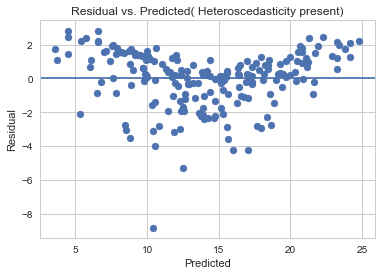

In [29]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

sns.set_style("whitegrid")

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts (skewed to the right)')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted( Heteroscedasticity present)')
plt.show()

As shown above, the error from the model is not normally distributed. The error is skewed to the right, similar to the raw data itself. 

Additionally, the distribution of error terms is not consistent, it is heteroscadastic. 

### Inspect the Data and Transform

The data is skewed to the right. The data is transformed by taking its square root to see if we can obtain a more normal distribution. 

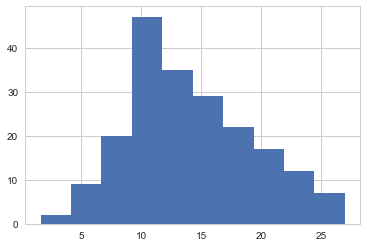

In [30]:
plt.hist(actual)
plt.show()

In [31]:
sqrt_actual = np.sqrt(actual)

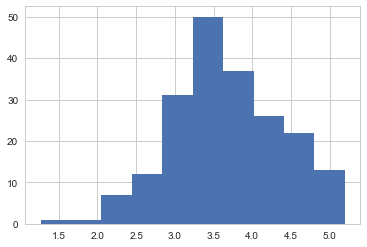

In [33]:
plt.hist(sqrt_actual)
plt.show()

That's a little better. Has this helped the multivariate normality? Yes. 

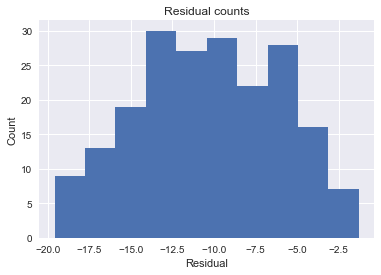

In [26]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
corr_residual = sqrt_actual - predicted

plt.hist(corr_residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

Transforming the data into the sqrt of the data lessened the skewness to the right, and allowed the error from the model to be more normally-distributed. Let's see if our transformation helped the problem with heteroscedasticity. 

### Homoscedasticity

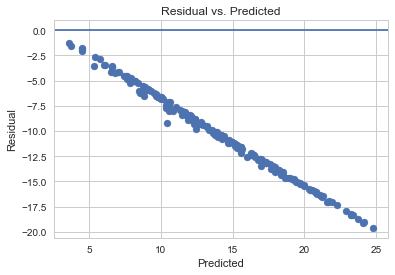

In [34]:
plt.scatter(predicted, corr_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


There was a big improvement here as well. Success!